# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.كل الوزن
- "shucked_wt" - the weight of abalone meat.اللحم
- "viscera_wt" - gut-weight.وزن الامعاء
- "shell_wt" - the weight of the dried shell.القشره
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:

df = pd.read_csv('./data/abalone.csv')
df.sample(4)

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
3853,F,0.570,0.465,0.155,0.9685,0.4460,0.2610,0.2550,9,10.5
4092,F,0.625,0.490,0.190,1.7015,0.7465,0.4105,0.3855,11,12.5
1636,M,0.575,0.470,0.185,0.9850,0.3745,0.2175,0.3550,10,11.5
213,M,0.500,0.405,0.140,0.6155,0.2410,0.1355,0.2050,9,10.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [4]:
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [5]:
df.isna().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

In [6]:
df.nunique()

sex              3
length         134
diameter       111
height          51
whole_wt      2429
shucked_wt    1515
viscera_wt     880
shell_wt       926
rings           28
age             28
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.corr()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
whole_wt,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
shucked_wt,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
viscera_wt,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
shell_wt,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


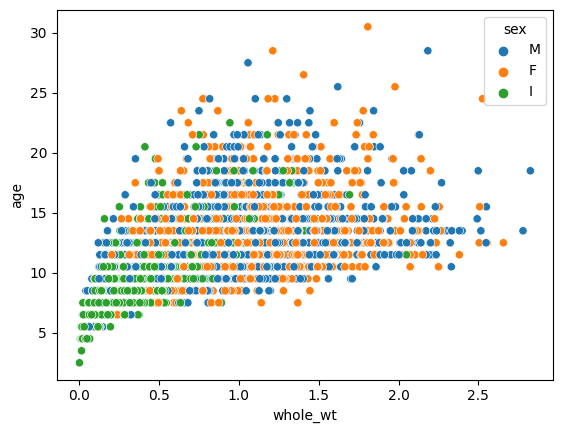

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'whole_wt',y = 'age',data = df,hue ='sex' )

plt.show()

In [10]:
df.value_counts('sex')

sex
M    1528
I    1342
F    1307
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

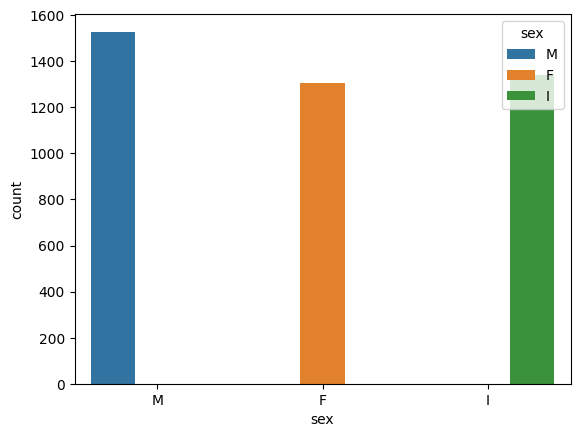

In [11]:
sns.countplot('sex',data = df,hue = 'sex')

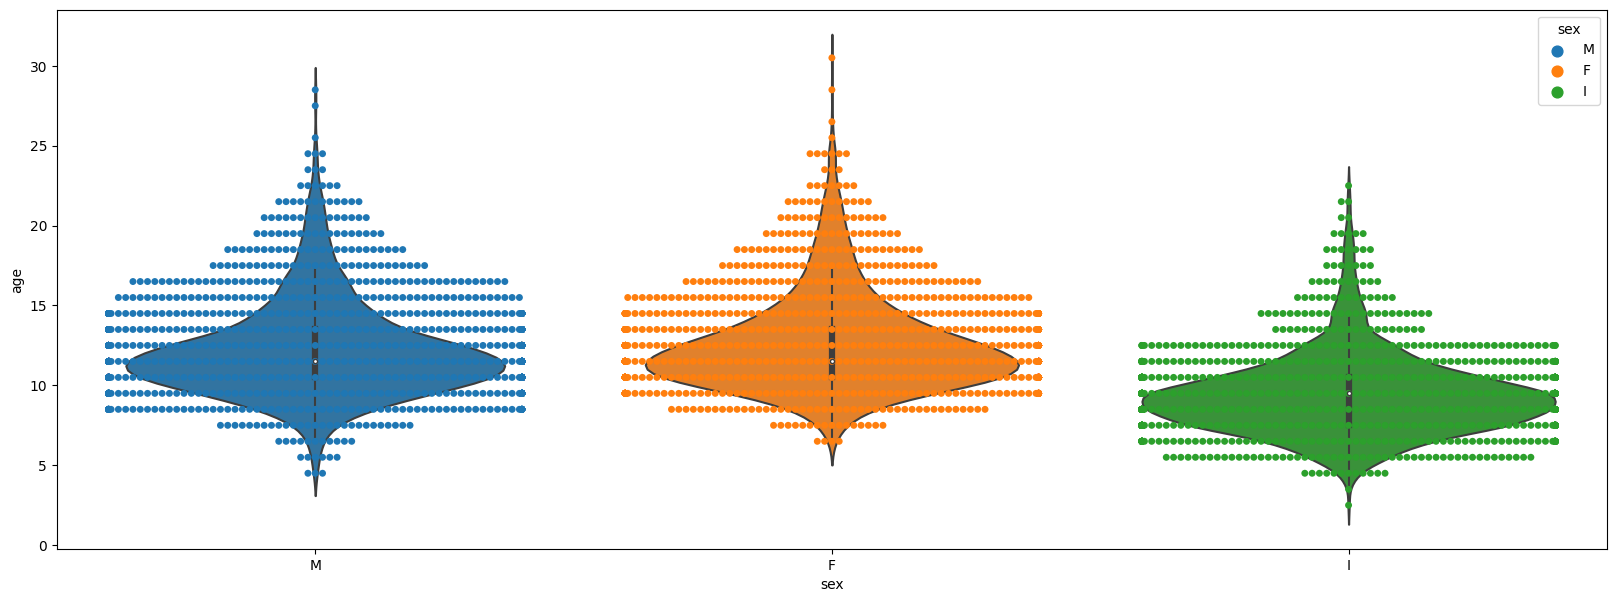

In [12]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'sex', y = 'age', data = df, hue = 'sex');
sns.violinplot(x = 'sex', y = 'age', data = df);

male majority lies from 7.5 years to 19.5

females majority lies  from 8 year to 19 year 

Immature majority lies between 6 year --> < 11 year 


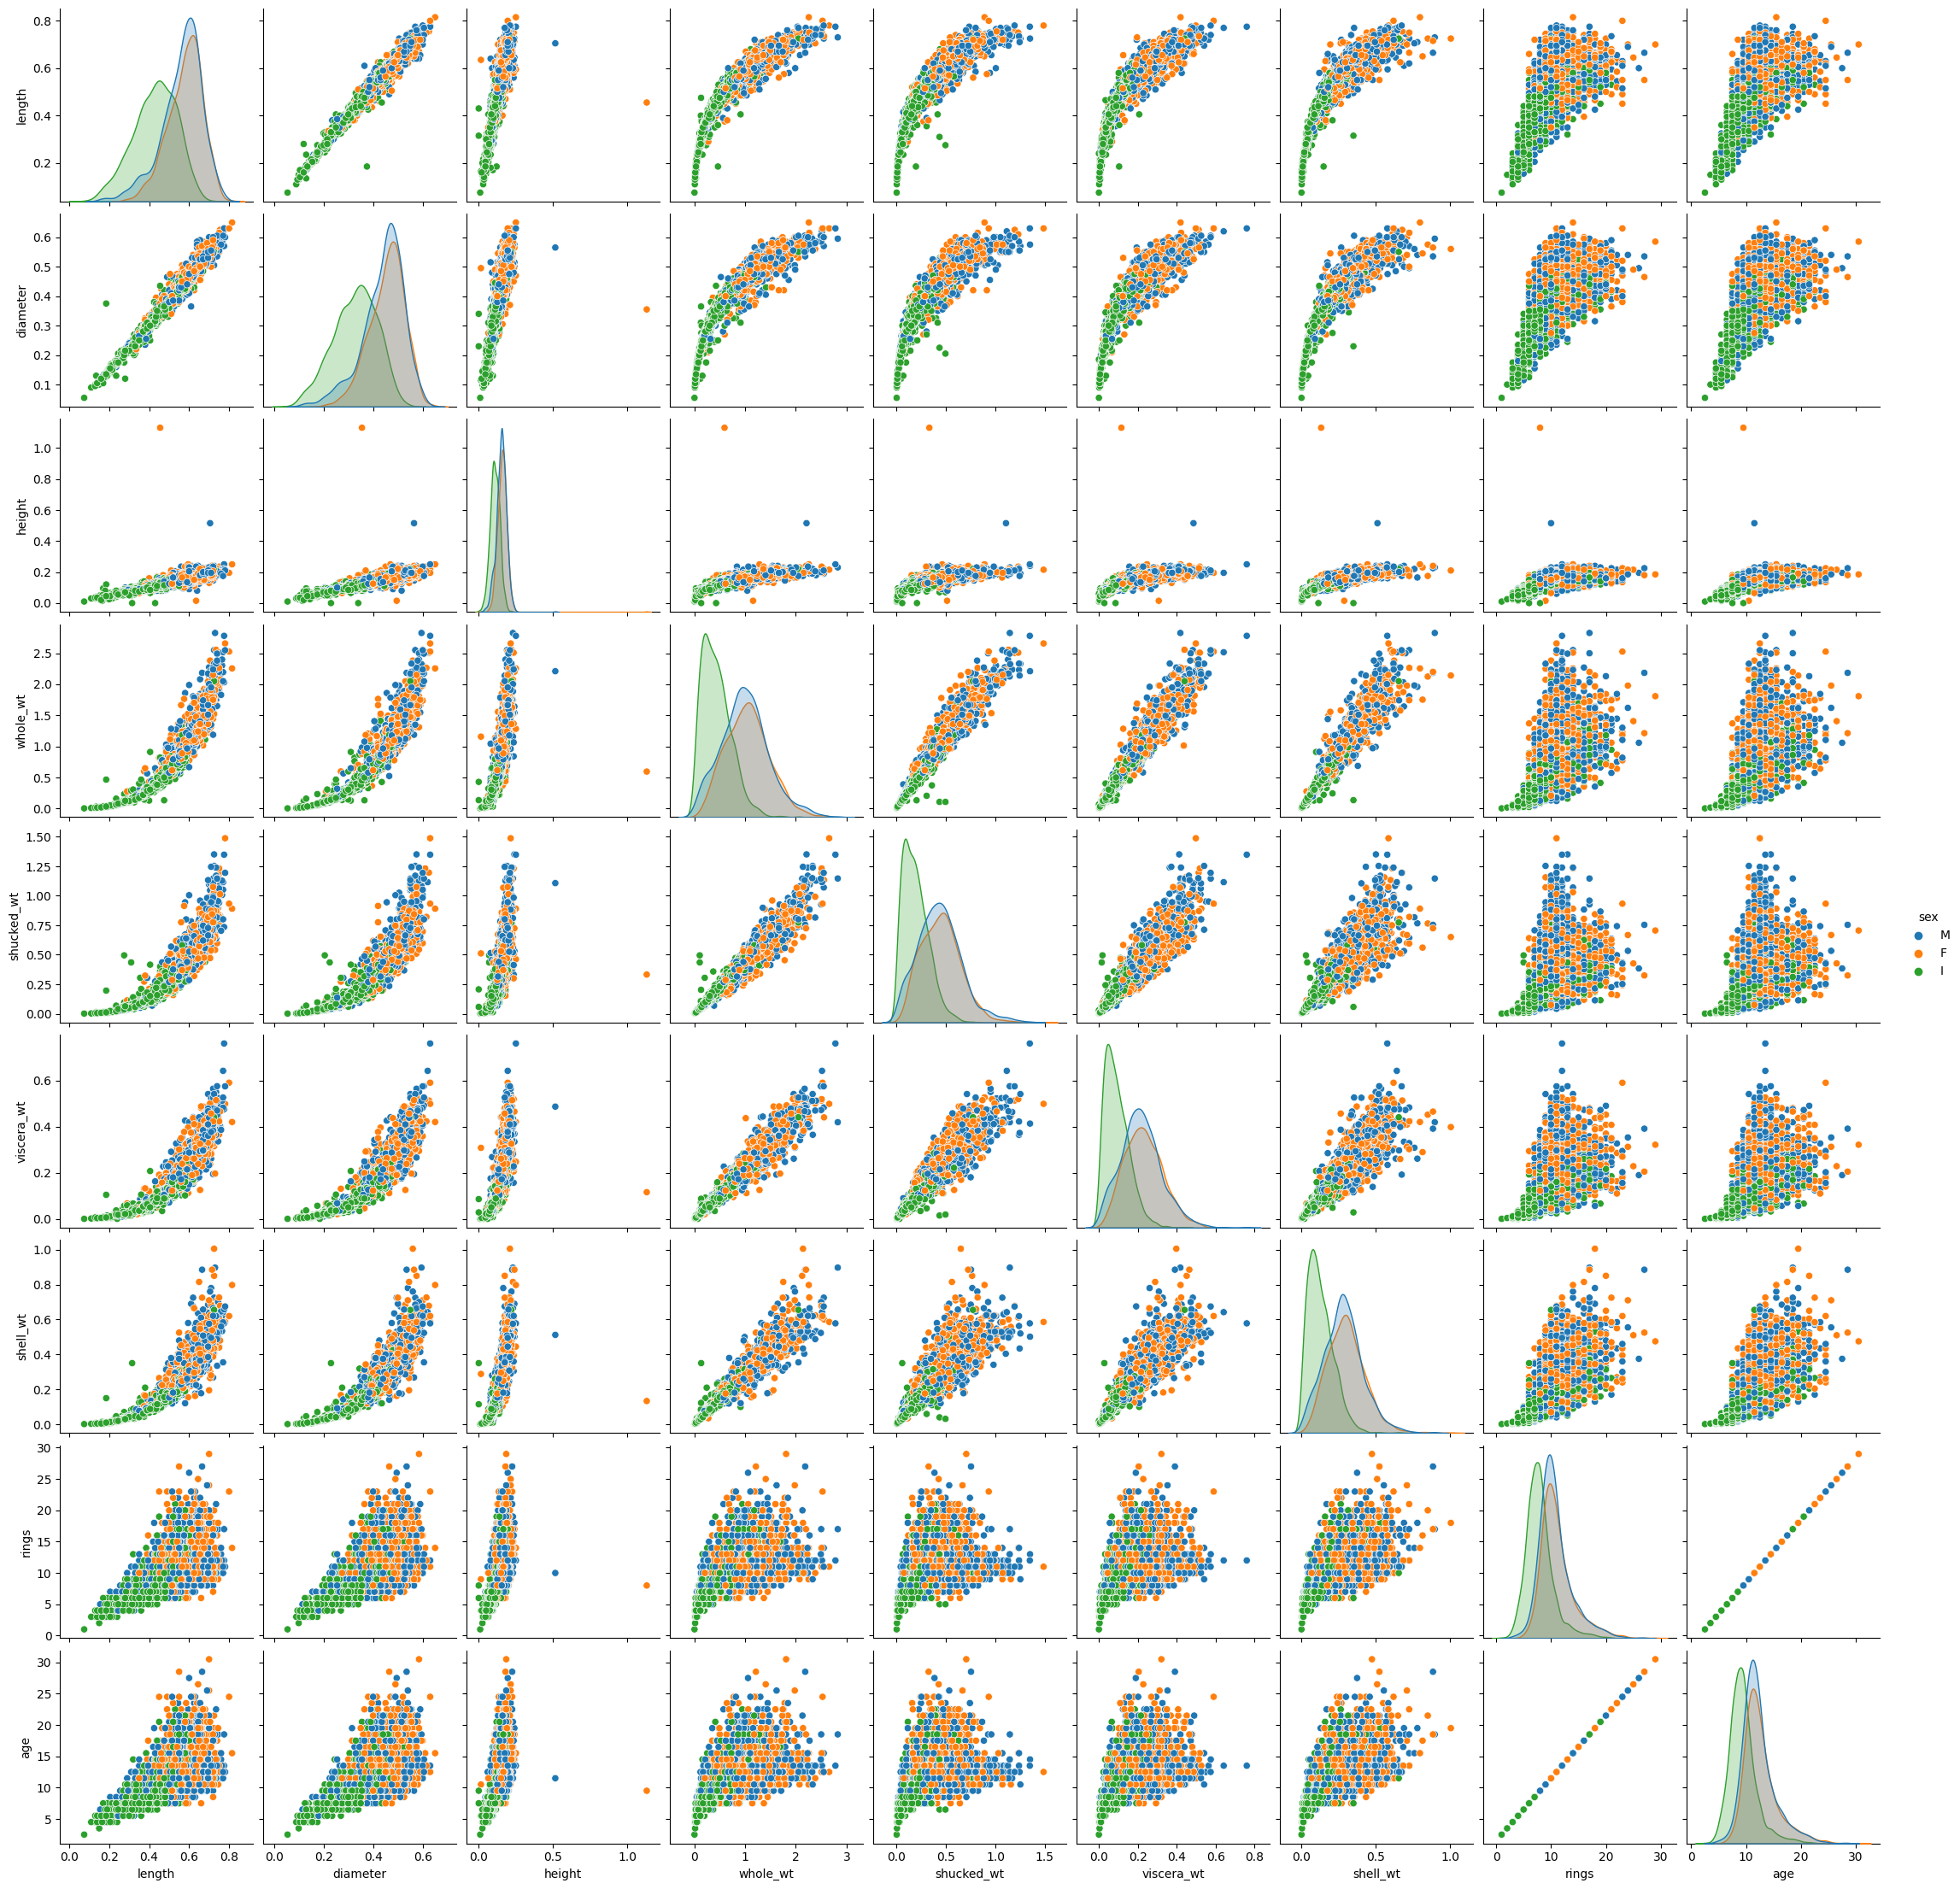

In [13]:
sns.pairplot(df,hue ='sex');
plt.show()


In [14]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_wt', 'shucked_wt',
       'viscera_wt', 'shell_wt', 'rings', 'age'],
      dtype='object')

In [15]:
df.groupby('sex')['length', 'diameter', 'height', 'whole_wt', 'shucked_wt',
       'viscera_wt', 'shell_wt', 'rings', 'age'].mean().sort_values('age')

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
sex,,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304,12.629304


# Investigate which variables are better predictors of age for abalones?

In [16]:
numerical_features = ["length", 'diameter', 'height','whole_wt',
                      'shucked_wt', 'viscera_wt', 'shell_wt','age']

<AxesSubplot:>

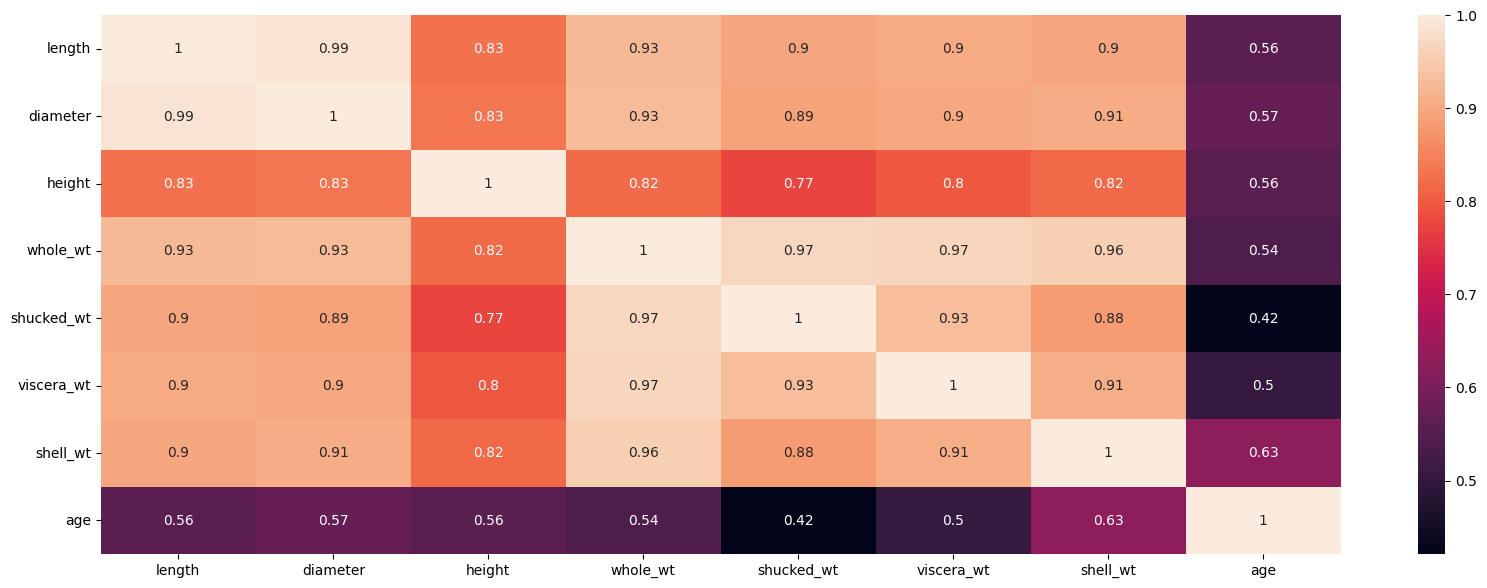

In [17]:
plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features].corr(), annot=True)

lenght and whole_weight are highly corrolated with all features except age
age is linearly crolated with shell_wt and with heigh 



>shell weight is the best describer for the age  

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


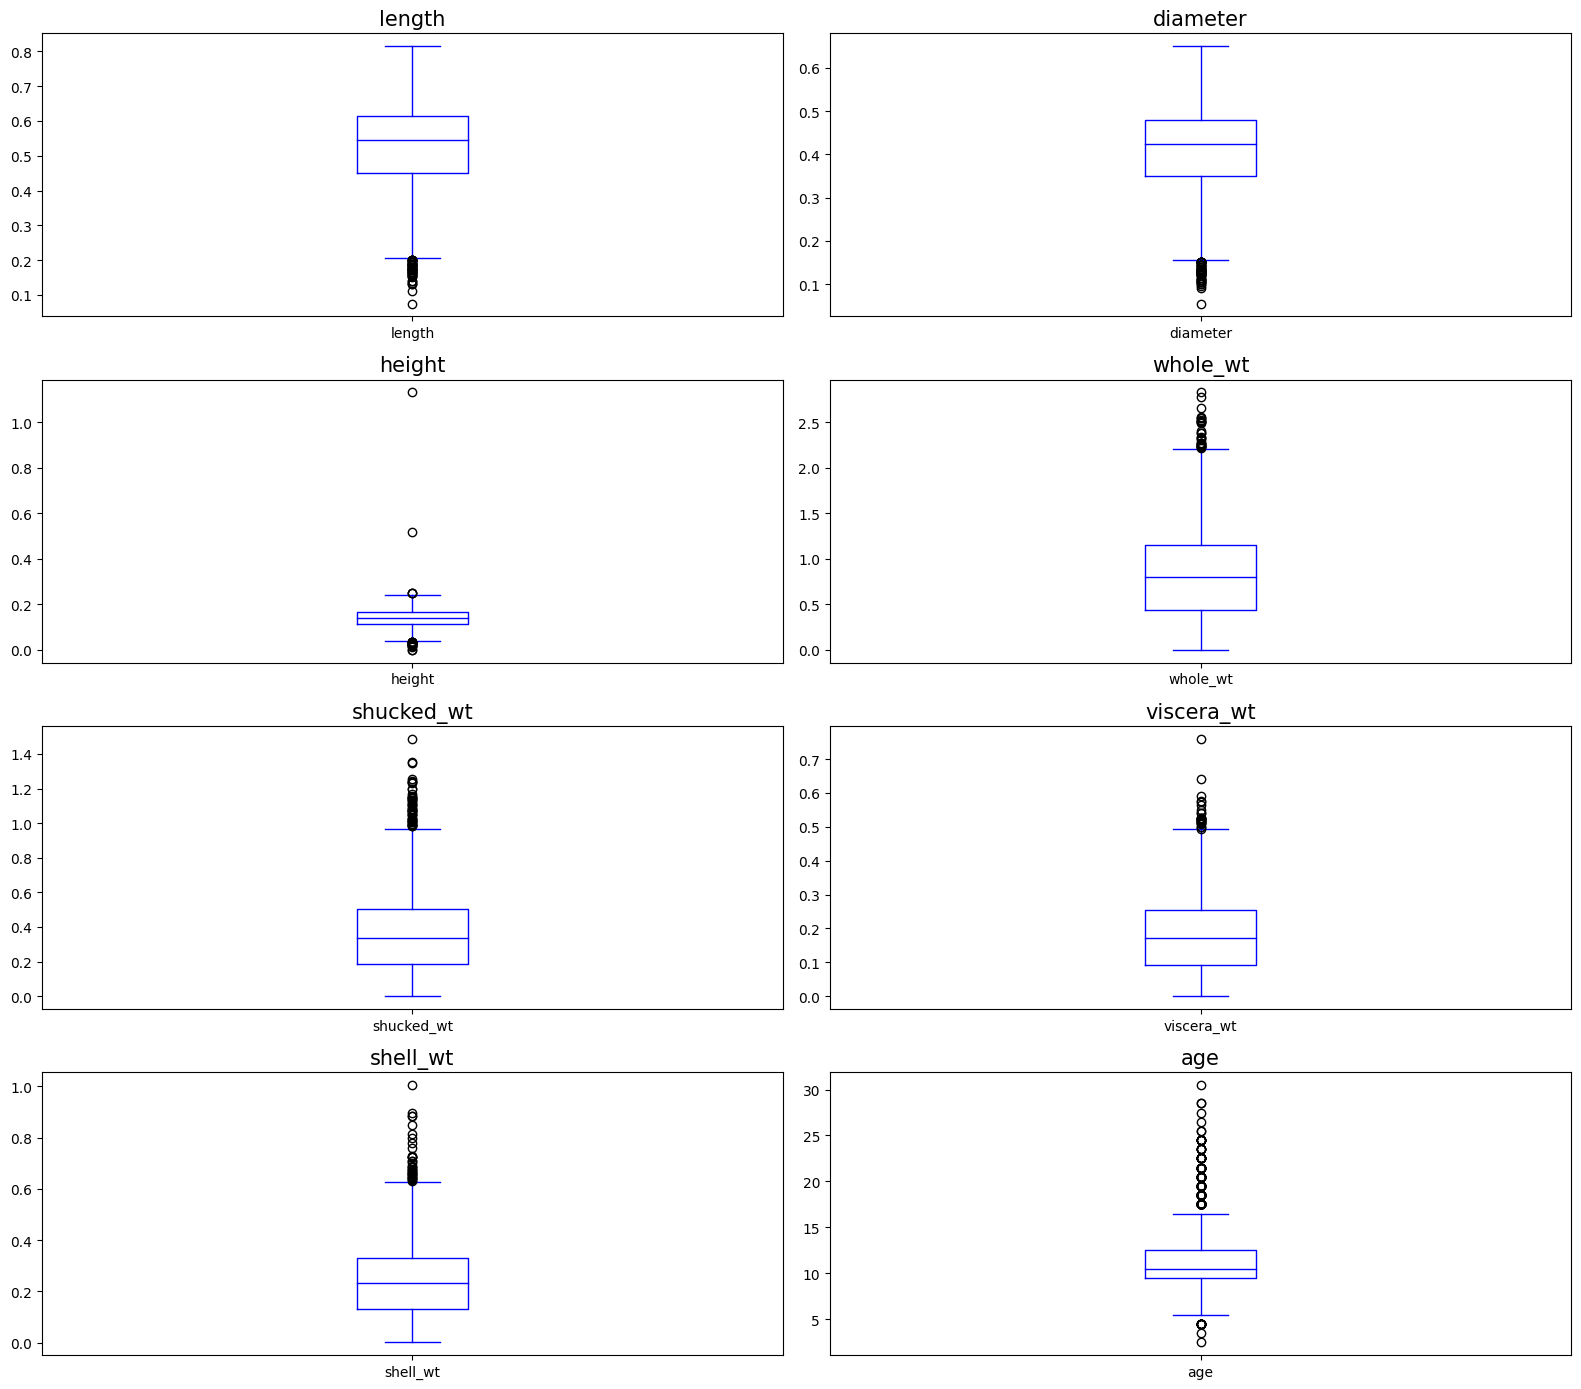

In [18]:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
print(axes)
axes = np.ravel(axes)
print(axes)
for i, c in enumerate(numerical_features):
    hist = df[c].plot(kind = 'box', ax=axes[i],color='blue', vert=True)
    axes[i].set_title(c, fontsize = 15)
    
plt.tight_layout()
plt.show()

In [19]:
def plotScatter(columnName):
    plt.scatter(x = df[columnName], y = df['age'],)
    plt.grid(True)
    
    

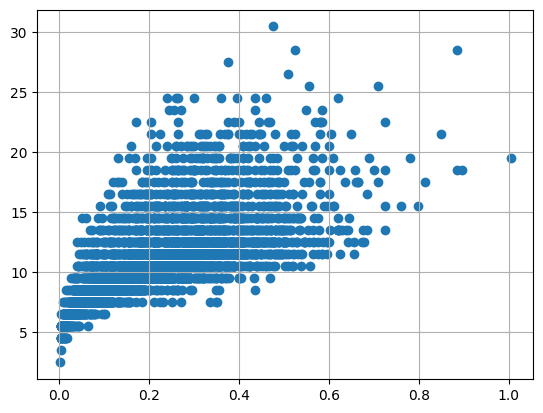

In [20]:
plotScatter('shell_wt')

In [21]:
df.drop(df[(df['shell_wt']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['shell_wt']<0.8) & (df['age'] > 25)].index, inplace=True)

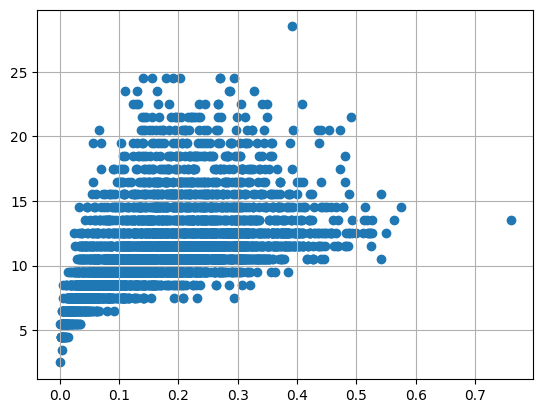

In [22]:
plotScatter('viscera_wt')

In [23]:
df.drop(df[(df['viscera_wt']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['viscera_wt']<0.5) & (df['age'] > 25)].index, inplace=True)

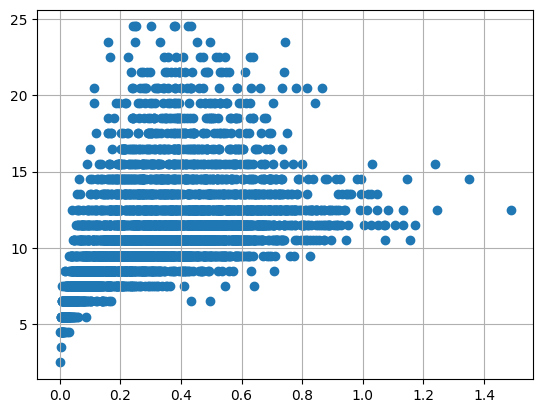

In [24]:
plotScatter('shucked_wt')

In [25]:
df.drop(df[(df['shucked_wt']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['shucked_wt']<1) & (df['age'] > 20)].index, inplace=True)

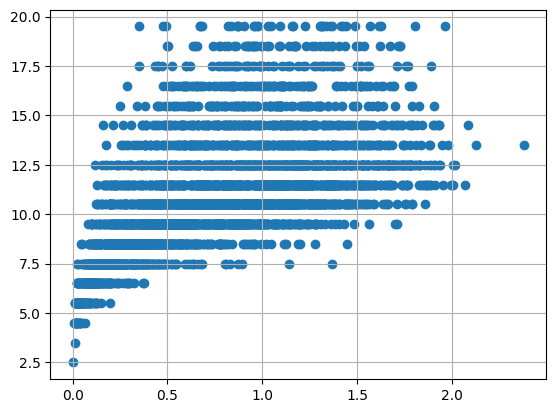

In [26]:
plotScatter('whole_wt')

In [27]:
df.drop(df[(df['whole_wt']>= 2.5) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['whole_wt']<2.5) & (df['age'] > 25)].index, inplace=True)

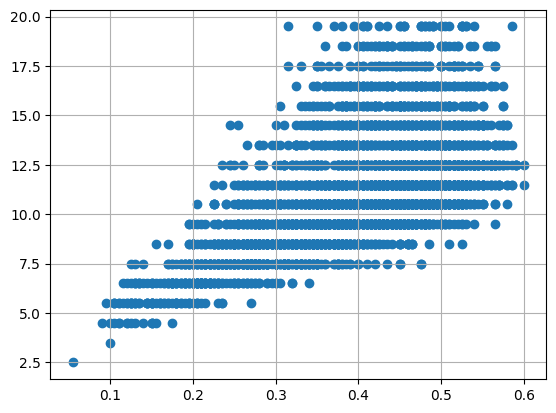

In [28]:
plotScatter('diameter')

In [29]:
df.drop(df[(df['diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['diameter']<0.6) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['diameter']>=0.6) & (df['age']< 25)].index, inplace=True)

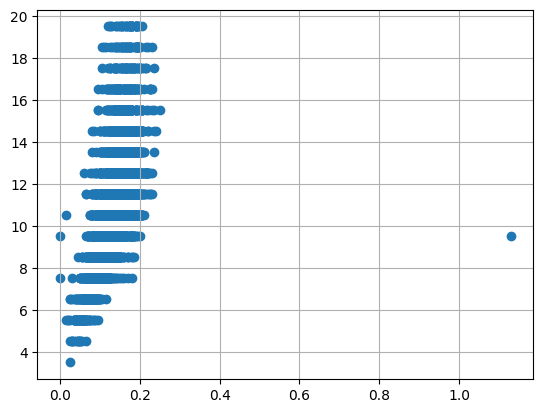

In [30]:
plotScatter('height')

In [31]:
df.drop(df[(df['height']>0.4) & (df['age'] < 15)].index, inplace=True)
df.drop(df[(df['height']<0.4) & (df['age'] > 25)].index, inplace=True)

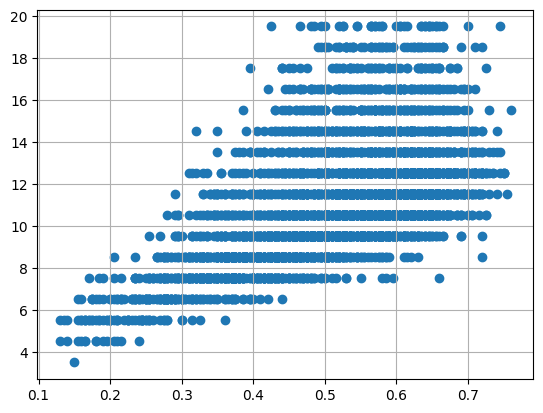

In [32]:
plotScatter('length')

In [33]:
df.drop(df[(df['length']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['length']<0.8) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['length']>=0.8) & (df['age']< 25)].index, inplace=True)

In [34]:
df.shape

(3995, 10)

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score


In [36]:
df['sex'] = df['sex'].replace(['F','M','I'],['1','0','-1'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         3995 non-null   object 
 1   length      3995 non-null   float64
 2   diameter    3995 non-null   float64
 3   height      3995 non-null   float64
 4   whole_wt    3995 non-null   float64
 5   shucked_wt  3995 non-null   float64
 6   viscera_wt  3995 non-null   float64
 7   shell_wt    3995 non-null   float64
 8   rings       3995 non-null   int64  
 9   age         3995 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 343.3+ KB


In [37]:
meanAge = round(df['age'].mean(),2)
meanAge

11.13

In [38]:
Age = []
for i in df['age']:
    if i > meanAge:
        Age.append('1')
    else:
        Age.append('0')
df['Age'] = Age
df.drop(['age'], axis = 1, inplace = True)
df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,-1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [39]:
X = df.drop(['Age'],axis = 1).values
y = df['Age'].values

In [40]:
df['Age'].value_counts()

0    2090
1    1905
Name: Age, dtype: int64

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

Confusion Matrix: 
 [[611   0]
 [  0 588]]
Training Score:  1.0
Testing Score:  1.0


In [46]:
dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train) 
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

Confusion Matrix: 
 [[611   0]
 [  0 588]]
Training Score:  1.0
Testing Score:  1.0


In [47]:
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train) 
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

Confusion Matrix: 
 [[611   0]
 [  0 588]]
Training Score:  1.0
Testing Score:  1.0
